In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

file = r'data_set/AustralianVisitors.csv'
visitors = pd.read_csv(file)
y = visitors['No of Visitors']

In [97]:
# 手动指数加权平滑，指数为alpha
alpha = 0.1
smoothed_manual = [y[0]]
print(y[0])
print(smoothed_manual)

177400
[177400]


In [98]:
for i in range(len(visitors)):
    smoothed_manual.append(alpha * y[i] + (1 - alpha) * smoothed_manual[i - 1])

print(smoothed_manual)
print(len(smoothed_manual))

[177400, 177400.0, 178720.0, 178580.0, 177648.0, 176862.0, 177103.2, 180005.80000000002, 179322.88, 181745.22000000003, 182990.592, 185960.69800000003, 191371.53280000002, 186974.62820000004, 196054.37952000002, 190057.16538000005, 196828.941568, 188571.44884200004, 194836.0474112, 191644.30395780003, 195262.44267008002, 191479.87356202005, 198666.19840307202, 197831.88620581804, 209039.57856276483, 202328.69758523625, 212685.62070648835, 207885.82782671263, 214047.05863583952, 208437.24504404137, 213102.35277225557, 212053.52053963725, 215782.11749503002, 213248.16848567352, 220923.905745527, 220513.35163710619, 233231.5151709743, 223512.01647339558, 240338.36365387688, 231900.814826056, 241814.5272884892, 230200.7333434504, 240723.07455964028, 235430.66000910537, 243190.76710367625, 237287.59400819484, 249031.6903933086, 244658.83460737535, 262528.52135397773, 250572.95114663782, 268185.66921858, 256865.65603197404, 270787.102296722, 255659.09042877663, 269848.3920670498, 263063.1813

In [99]:
# 使用内置的方法计算不同alpha的指数加权移动平均
smoothed1 = y.ewm(alpha=0.05, adjust=True).mean()
smoothed2 = y.ewm(alpha=0.1, adjust=True).mean()
smoothed3 = y.ewm(alpha=0.3, adjust=True).mean()
smoothed4 = y.ewm(alpha=0.7, adjust=True).mean()

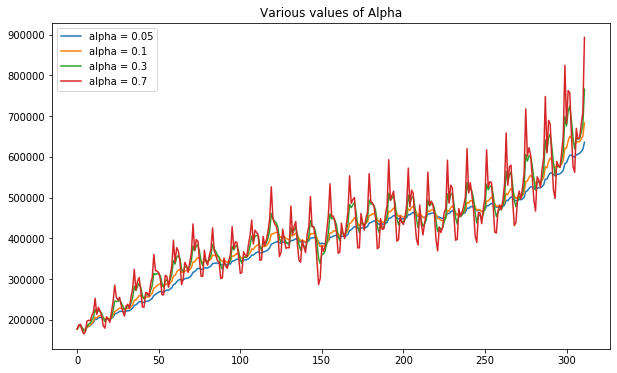

In [100]:
fig = plt.figure(figsize=(10, 6))
plt.plot(smoothed1, label='alpha = 0.05')
plt.plot(smoothed2, label='alpha = 0.1')
plt.plot(smoothed3, label='alpha = 0.3')
plt.plot(smoothed4, label='alpha = 0.7')
plt.title('Various values of Alpha')
plt.legend(loc='upper left')

In [101]:
plt.show(block=False)
fig.savefig('EWMA of different Alpha.pdf')

In [102]:
def sse(x, y):
    return np.sum(np.power(x - y, 2))


sse_one = []
alphas = np.arange(0.01, 1, 0.01)

for i in alphas:
    smoothed_one = y.ewm(alpha=i, adjust=True).mean()
    sse_one.append(sse(smoothed_one[:-1], y.values[1:]))

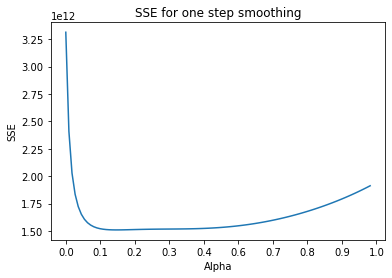

In [103]:
plt.figure()
plt.plot(sse_one)
plt.title('SSE for one step smoothing')
plt.ylabel('SSE')
plt.xlabel('Alpha')
plt.xticks(np.linspace(0, 100, 10),
           ['{0:1.1f}'.format(x) for x in np.linspace(0, 1, 10)])
plt.show(block=False)

In [104]:
optimal_alpha_one = alphas[np.argmin(sse_one)]
print(optimal_alpha_one)

0.17


In [105]:
sse_two = []
alphas = np.arange(0.01, 1, 0.001)
for i in alphas:
    smoothed_two = smoothed_one.ewm(alpha=i, adjust=True).mean()
    sse_two.append(sse(smoothed_two[:-2], y.values[2:]))

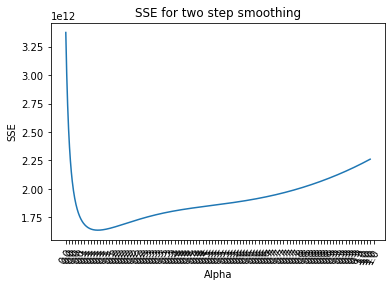

In [106]:
plt.figure()
plt.plot(sse_two)
plt.title('SSE for two step smoothing')
plt.xlabel('Alpha')
plt.ylabel('SSE')
plt.xticks(np.linspace(0, 1000, 100),
           ['{0:1.1f}'.format(x) for x in np.linspace(0, 1, 100)],
           rotation='60')
plt.show(block=False)

In [107]:
optimal_alpha_two = alphas[np.argmin(sse_two)]
print(optimal_alpha_two)

0.11399999999999991
